## Online Python tutorials

* [core functionality required for the course](https://colab.research.google.com/github/rhaschke/Neural-Networks/blob/master/Intro%20Colab%2BTensors.ipynb)
* Python Basics: [en](https://docs.python.org/3/tutorial) / [de](https://py-tutorial-de.readthedocs.io/de/python-3.3)
* [python+colab tutorial](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb)
* [matplotlib tutorials](https://matplotlib.org/stable/tutorials/index.html)

## 1. Display random walk data

A random walk adds a (small) random vector to the current state $x(t)$ like this: $x(t+1) = x(t) + \eta$, where $\eta$ is just a random variable, e.g. uniformly distributed in range $[-1, 1]$.

1. Generate a 1d random walk time series, starting from $x(0) = 0$ and display the series with matplotlib (as $x(t)$).
2. Generate a 2d random walk time series, starting from $x(0) = 0$ and display the series with matplotlib (as $x_2(x_1)$).

Avoid using any manual loops (`for` or `while`), but use numpy array functions instead. For example, look for [`cumsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html).

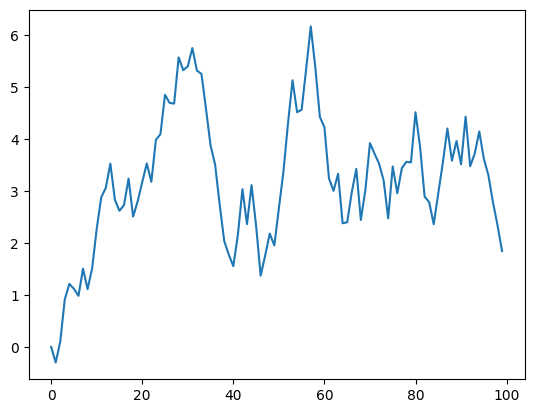

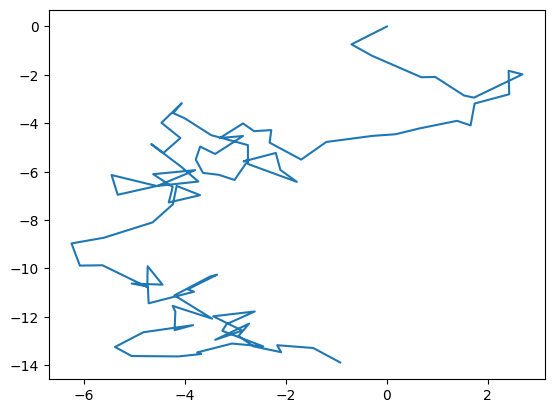

In [1]:
import numpy as np
import matplotlib.pyplot as plt

eta = np.random.uniform(-1.0, 1.0, size=(100,))
eta[0] = 0  # start accumulation at zero
plt.plot(np.cumsum(eta))

eta2 = np.random.uniform(-1.0, 1.0, size=(100,2))
eta2[0] = [0,0]  # start accumulation at (0,0)
plt.figure()
plt.plot(*np.cumsum(eta2, axis=0).T)

## 2. More Plotting

1. Display the two-dimensional manifold $z=x \cdot y$ as a [wireframe and surface plot](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#toolkit-mplot3d-tutorial).
Sample the data in the range $[-1,1]^2$ with 20 samples in each direction.

2. Randomly select 30 images from the MNIST dataset and display them in a $5 \times 6$ grid using subplots.

Again, avoid explicit loops as far as possible.

x: [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
y: [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
(20, 10) (20, 10)


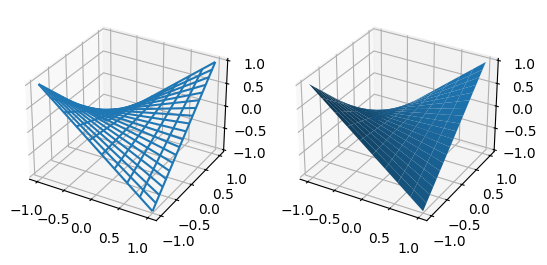

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # enable 3d plotting

# create ranges for x and y
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 20)
print("x:", x)
print("y:", y)
# and broadcast them into a grid
X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)
Z =  X * Y

# create two 3d plots in 1x2 table
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(X, Y, Z)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, Z);

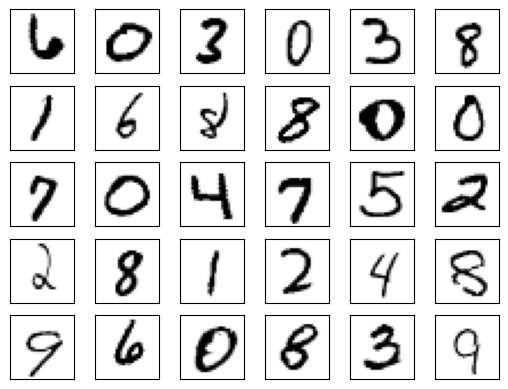

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
selection = np.random.choice(x_train.shape[0],30)
samples = x_train[selection]

fig = plt.figure()
for idx in range(samples.shape[0]):
    ax = fig.add_subplot(5,6, idx+1, xticks=[], yticks=[]) # add subplot w/o any axis labels
    ax.imshow(samples[idx], cmap = "Greys")

## 3. Tensors

1. Split the MNIST data set into 120 batches á 500 samples and arrange them as a 4d tensor with the shape (120, 500, 28, 28).

2. Create a new shuffling of these batches.

(120, 500, 28, 28)
(120, 500, 28, 28)
(120, 500, 28, 28)
(120, 500, 28, 28)


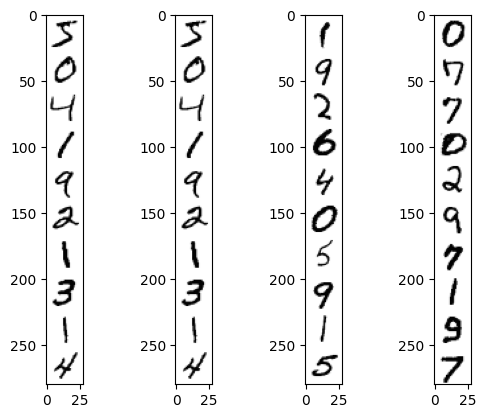

In [5]:
fig, ax = plt.subplots(1,4)

batches = x_train.reshape(120,-1,28,28)  # 1st option: reshaping
print(batches.shape)
ax[0].imshow(batches[0,:10].reshape(-1,28), cmap="Greys")

batches = np.array(np.split(x_train, 120))  # 2nd option: split
print(batches.shape)
ax[1].imshow(batches[0,:10].reshape(-1,28), cmap="Greys")

# shuffle acts on the first (batch) axis always
np.random.shuffle(batches)
print(batches.shape)
ax[2].imshow(batches[0,:10].reshape(-1,28), cmap="Greys")

# Usually shuffling should involve the whole dataset - before batching
batches = x_train[np.random.permutation(x_train.shape[0])].reshape(120,-1,28,28)
print(batches.shape)
ax[3].imshow(batches[0,:10].reshape(-1,28), cmap="Greys");

## 4. Broadcast Operations
In order to perform polynomial fitting we will need to collect the powers $x^1, x^2, x^3, x^4$ of our data samples x in a design matrix A with

$A_{ij} = x_i^j$
 
Create this matrix employing numpy's vectorization and broadcasting capabilities. Don't write an explicit loop.

In [6]:
x = np.arange(-1,1,0.1)
A = np.power(np.transpose([x]), [1,2,3,4])
np.set_printoptions(suppress=True) # print numbers in fixed point notation
print(A)

[[-1.      1.     -1.      1.    ]
 [-0.9     0.81   -0.729   0.6561]
 [-0.8     0.64   -0.512   0.4096]
 [-0.7     0.49   -0.343   0.2401]
 [-0.6     0.36   -0.216   0.1296]
 [-0.5     0.25   -0.125   0.0625]
 [-0.4     0.16   -0.064   0.0256]
 [-0.3     0.09   -0.027   0.0081]
 [-0.2     0.04   -0.008   0.0016]
 [-0.1     0.01   -0.001   0.0001]
 [-0.      0.     -0.      0.    ]
 [ 0.1     0.01    0.001   0.0001]
 [ 0.2     0.04    0.008   0.0016]
 [ 0.3     0.09    0.027   0.0081]
 [ 0.4     0.16    0.064   0.0256]
 [ 0.5     0.25    0.125   0.0625]
 [ 0.6     0.36    0.216   0.1296]
 [ 0.7     0.49    0.343   0.2401]
 [ 0.8     0.64    0.512   0.4096]
 [ 0.9     0.81    0.729   0.6561]]


In [ ]:
### Submission: Working solution, although slower. Not everything can be vectorized efficiently
import numpy as np
from timeit import timeit

def do_this():
    x = np.arange(-1,1,0.1)
    A = []
    def design_matrix_row(n):
        A.append(n)
        A.append(n ** 2)
        A.append(n ** 3)
        A.append(n ** 4)

    design_matrix_whole = np.vectorize(design_matrix_row)
    design_matrix_whole(x)  #for some reason the first entry is duplicated when doing this, I fix that in the next line with A[4::]
    design_matrix = np.reshape(A[4::], (x.size, 4))

timeit(do_this)

def do_that():
    x = np.arange(-1,1,0.1)
    A = np.power(np.transpose([x]), [1,2,3,4])
    np.set_printoptions(suppress=True) # print numbers in fixed point notation
timeit(do_that)

## 5. Timing

Use [timeit](https://docs.python.org/3.8/library/timeit.html) to compare the computation time required for `naive_add` introduced [here](https://colab.research.google.com/github/rhaschke/Neural-Networks/blob/master/Intro%20Colab%2BTensors.ipynb) and numpy's vector-based *add*. For meaningful results, consider random matrices of size larger than $1000^2$.

In [ ]:
import timeit
def naive_add(x, y):
  assert len(x.shape) == 2      # x & y are 2D numpy tensors
  assert x.shape == y.shape
  x = x.copy()                  # Avoid overwriting the input tensor
  
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

x = np.random.rand(1000,1000)
#%timeit(naive_add(x,x))
#%timeit(np.add(x,x))
#%timeit(x+x)

In [10]:
# Timing naive_add
time_naive = timeit.timeit(
    stmt='naive_add(x, x)',
    setup='from __main__ import naive_add, x',
    number=3
)
print(f"naive_add time (avg over 3 runs): {time_naive / 3:.6f} seconds")

# Timing np.add
time_np_add = timeit.timeit(
    stmt='np.add(x, x)',
    setup='import numpy as np; from __main__ import x',
    number=100
)
print(f"np.add time (avg over 100 runs): {time_np_add / 100:.6f} seconds")

# Timing x + x
time_plus = timeit.timeit(
    stmt='x + x',
    setup='from __main__ import x',
    number=100
)
print(f"x + x time (avg over 100 runs): {time_plus / 100:.6f} seconds")

naive_add time (avg over 3 runs): 0.242250 seconds
np.add time (avg over 100 runs): 0.000537 seconds
x + x time (avg over 100 runs): 0.000518 seconds


## Biological Neuron and Perception

In [ ]:
#!pip install scikit-learn

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Generate synthetic 2D data for 3 classes
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Toy Data for 3-Class Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
class MultiClassPerceptron:
    def __init__(self, n_classes, n_features, learning_rate=1.0):
        self.n_classes = n_classes
        self.learning_rate = learning_rate
        self.weights = np.zeros((n_classes, n_features))  # Each row = weights for one class

    def predict(self, x):
        scores = self.weights @ x
        return np.argmax(scores)

    def update(self, x, true_class, pred_class):
        self.weights[true_class] += self.learning_rate * x
        self.weights[pred_class] -= self.learning_rate * x

    def fit(self, X, y, epochs=10):
        for _ in range(epochs):
            for i in range(X.shape[0]):
                x = X[i]
                true_class = y[i]
                pred_class = self.predict(x)
                if pred_class != true_class:
                    self.update(x, true_class, pred_class)

    def decision_function(self, X):
        return self.weights @ X.T

**Note**: This is slightly different than described in a2_BiologicalNeuron.ipynb. The update here is strictly depending on if the predicted class is correct or incorrect with respective related weights updated positively (for weights connected to the correctly classifying output) or negatively (for weights connected to the wrongly classifying output). In a2, there would be no update for weights related to the correctly classified output: wᵢ(new) = wᵢ(old) and b(new) = b(old) for ŷ = y. Still the weights related to wrong predictions would get updated.

In [ ]:
# Initialize and train
n_classes = 3
n_features = 2

perceptron = MultiClassPerceptron(n_classes=n_classes, n_features=n_features)
perceptron.fit(X, y, epochs=10)

In [ ]:
def plot_decision_boundary(perceptron, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([perceptron.predict(pt) for pt in grid])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['darkred', 'darkgreen', 'darkblue']

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    for i in range(3):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], c=cmap_bold[i], label=f"Class {i}", edgecolor='k')
    plt.legend()
    plt.title("Perceptron Decision Boundaries")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

In [ ]:
plot_decision_boundary(perceptron, X, y)